## Importing the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore') 

## Loading the data  from sample data(dataset)

In [2]:

dataset =  pd.read_csv("diamond data.csv")
dataset

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,depth,table,Price,Length,Width,Height
0,2.51,Very Good,G,VS2,VG,VG,GIA,62.2,54.0,34361,4.35,4.37,2.71
1,2.60,Ideal,G,VS2,EX,EX,GIA,63.3,56.0,37621,4.26,4.30,2.71
2,2.04,Very Good,D,VVS1,VG,VG,GIA,60.7,59.0,41867,3.97,4.01,2.42
3,2.12,Ideal,F,VS1,EX,EX,GIA,58.4,63.0,33667,4.19,4.24,2.46
4,2.29,Ideal,G,VS2,VG,VG,GIA,63.3,60.0,27097,4.00,4.03,2.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2594,1.58,Ideal,I,VVS1,ID,ID,AGSL,60.3,59.0,11526,6.51,6.45,3.91
2595,1.63,Ideal,D,SI1,EX,EX,GIA,67.1,59.0,13625,6.16,6.09,4.11
2596,1.04,Signature-Ideal,F,VVS2,EX,EX,GIA,61.6,60.0,10804,6.22,6.18,3.82
2597,1.24,Good,H,VS2,G,G,GIA,63.2,55.0,7210,6.40,6.32,4.02


## Checking any null/missing values in sample data

In [3]:
dataset.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
depth           0
table           0
Price           0
Length          0
Width           0
Height          0
dtype: int64

In [4]:
dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,depth,table,Price,Length,Width,Height
0,2.51,Very Good,G,VS2,VG,VG,GIA,62.2,54.0,34361,4.35,4.37,2.71
1,2.60,Ideal,G,VS2,EX,EX,GIA,63.3,56.0,37621,4.26,4.30,2.71
2,2.04,Very Good,D,VVS1,VG,VG,GIA,60.7,59.0,41867,3.97,4.01,2.42
3,2.12,Ideal,F,VS1,EX,EX,GIA,58.4,63.0,33667,4.19,4.24,2.46
4,2.29,Ideal,G,VS2,VG,VG,GIA,63.3,60.0,27097,4.00,4.03,2.54


## Descriptive statistics can give you great insight into the shape of each attribute.

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Carat Weight,2599.0,1.327715,0.472034,0.75,1.00,1.13,1.570,2.80
depth,2599.0,61.814852,1.699158,43.00,61.00,61.90,62.700,71.60
table,2599.0,57.637784,2.374013,51.00,56.00,57.00,59.000,70.00
Price,2599.0,11602.846479,10074.514098,2184.00,5104.50,7880.00,14571.500,96493.00
Length,2599.0,5.764078,0.584169,3.79,5.69,5.83,6.080,7.43
Width,2599.0,5.762974,0.571896,3.75,5.70,5.84,6.060,7.35
Height,2599.0,3.563163,0.368074,2.27,3.51,3.59,3.765,4.70


## Using the Heatmap graph to identify the most important feature to predict the Diamond price only for numerical variables. 

In [6]:
corr = dataset.corr()
corr.style.background_gradient()

,Carat Weight,depth,table,Price,Length,Width,Height
Carat Weight,1.000000,0.003149,-0.010386,0.854823,0.000135,-0.000281,0.003287
depth,0.003149,1.000000,-0.285883,0.012227,-0.022464,-0.031941,0.235392
table,-0.010386,-0.285883,1.000000,-0.017625,0.155309,0.138046,0.065429
Price,0.854823,0.012227,-0.017625,1.000000,-0.005520,-0.005961,0.000121
Length,0.000135,-0.022464,0.155309,-0.005520,1.000000,0.995700,0.962973
Width,-0.000281,-0.031941,0.138046,-0.005961,0.995700,1.000000,0.960165
Height,0.003287,0.235392,0.065429,0.000121,0.962973,0.960165,1.000000


##  Lineplot showing the relationship between Carat Weight and Price variables.

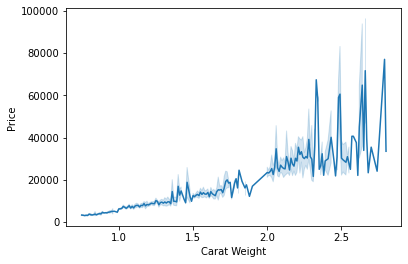

<Figure size 2160x720 with 0 Axes>

In [7]:
sns.lineplot(x="Carat Weight", y="Price", data=dataset)
plt.figure(figsize = (30, 10))
plt.show()

## Barplot for showing the Count of categorical Columns - {Cut, Color, Clarity}

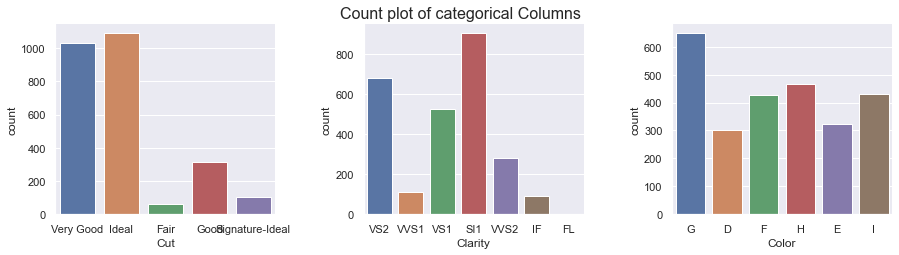

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3.5))

fig.suptitle('Count plot of categorical Columns', y = 0.95, fontsize = 16)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

for pos, name in enumerate(['Cut', 'Clarity', 'Color']):
    sns.countplot(data = dataset, x = name, ax = axes.flat[pos]);

sns.despine()

# Plot pairwise relationships in a dataset.
# Seaborn - Visualizing Pairwise Relationship 
# To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function.

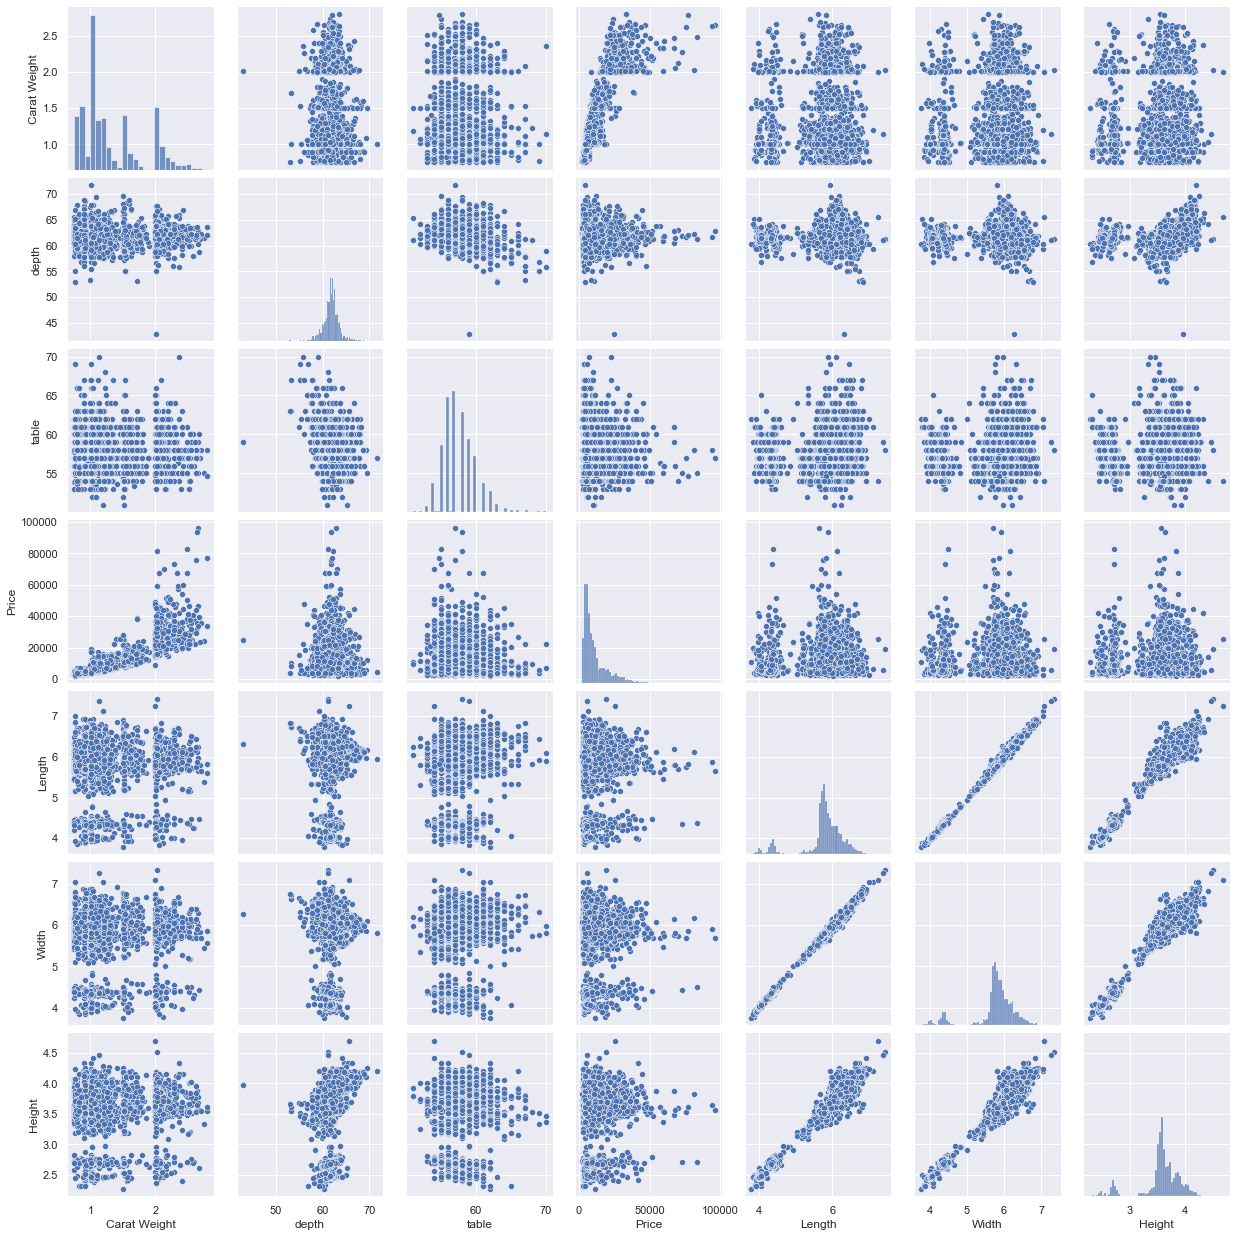

In [9]:
sns.pairplot(dataset)

## Using LabelEncoder, categorical values have been converted into numeric values to perform better in models.

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()

temp_data = ['Cut', 'Color','Clarity', 'Polish', 'Symmetry', 'Report']

dataset[temp_data] = dataset[temp_data].fillna('None')
dataset[temp_data]=dataset[temp_data].fillna(dataset[temp_data].mean())
for i in temp_data:
  dataset[i] = label_encode.fit_transform(dataset[i])

dataset.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,depth,table,Price,Length,Width,Height
0,2.51,4,3,4,3,3,1,62.2,54.0,34361,4.35,4.37,2.71
1,2.60,2,3,4,0,0,1,63.3,56.0,37621,4.26,4.30,2.71
2,2.04,4,0,5,3,3,1,60.7,59.0,41867,3.97,4.01,2.42
3,2.12,2,2,3,0,0,1,58.4,63.0,33667,4.19,4.24,2.46
4,2.29,2,3,4,3,3,1,63.3,60.0,27097,4.00,4.03,2.54


## Using MinMaxScaler technique for scaling numerical data prior to modeling are normalization and standardization.

In [11]:
from sklearn import preprocessing
import pandas as pd

scaler = preprocessing.MinMaxScaler()
names = dataset.columns
d = scaler.fit_transform(dataset)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,depth,table,Price,Length,Width,Height
0,0.858537,1.0,0.6,0.666667,1.0,1.0,1.0,0.671329,0.157895,0.341187,0.153846,0.172222,0.181070
1,0.902439,0.5,0.6,0.666667,0.0,0.0,1.0,0.709790,0.263158,0.375754,0.129121,0.152778,0.181070
2,0.629268,1.0,0.0,0.833333,1.0,1.0,1.0,0.618881,0.421053,0.420776,0.049451,0.072222,0.061728
3,0.668293,0.5,0.4,0.500000,0.0,0.0,1.0,0.538462,0.631579,0.333828,0.109890,0.136111,0.078189
4,0.751220,0.5,0.6,0.666667,1.0,1.0,1.0,0.709790,0.473684,0.264164,0.057692,0.077778,0.111111


## Spliting the Sample data into inputs (independent variables) as X and output (dependent variable) as y

In [12]:
X=scaled_df.drop(['Price'], axis=1)
y=scaled_df.iloc[:,-4]

## Now using the train test split techinque splitting the X and y into training data 80% and test data 20% 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

In [14]:
print(X_train.shape)
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape) 

(2079, 12)
(520, 12)
(2079,)
(520,)


## Assessment of building model Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model_lr = LinearRegression(normalize=True)
model_lr

LinearRegression(normalize=True)

In [17]:
model_lr = model_lr.fit(X_train, y_train)

In [18]:
print(model_lr.coef_)

[ 0.41050058  0.00586976 -0.08737977  0.03576192 -0.00145669 -0.00907518
 -0.007983   -0.02897534 -0.00496007 -0.05929639  0.01710567  0.04564273]


In [19]:
print(model_lr.intercept_)

0.04013071140597057


In [20]:
pd.DataFrame(model_lr.coef_, X.columns, columns = ['Coeff'])

,Coeff
Carat Weight,0.410501
Cut,0.005870
Color,-0.087380
Clarity,0.035762
Polish,-0.001457
Symmetry,-0.009075
Report,-0.007983
depth,-0.028975
table,-0.004960
Length,-0.059296


In [21]:
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([ 1.71647420e-02,  2.03150000e-02,  7.10850331e-02,  5.18109024e-02,
        2.32630542e-02,  1.16141764e-01,  2.18452307e-01,  6.12045909e-02,
        1.15242381e-01,  3.81155726e-02, -2.32819321e-03,  3.58297543e-01,
       -4.72239851e-02,  1.22617399e-01,  2.15290630e-02, -4.78648997e-02,
        6.68597338e-03,  1.17695818e-01,  7.66204793e-02,  9.07577861e-02,
        1.58347505e-01,  1.19076573e-01,  2.35096827e-01,  2.83468543e-01,
       -4.20720196e-02, -1.29452645e-02,  3.40274997e-02,  6.71924166e-03,
        3.12364983e-01,  2.17327013e-02,  1.32136901e-02,  2.96085108e-03,
        4.60005005e-02,  8.79812769e-02,  3.48715334e-02, -3.38657155e-02,
        2.13848089e-01,  4.44395037e-02,  1.06673446e-01,  2.51609995e-01,
        1.49188364e-01, -7.31784931e-03,  2.58203944e-01,  2.54741613e-01,
       -2.00824551e-04,  2.44821397e-01,  8.48703720e-03,  1.95294922e-01,
        1.12022217e-01, -2.84613538e-02,  1.61980892e-01,  3.55444311e-02,
        1.06946119e-01,  

In [22]:
print("R^2 score of linear regression:",metrics.r2_score(y_pred_lr, y_test))

R^2 score of linear regression: 0.7910450685543343


In [23]:
print("MAE of linear regression:",metrics.mean_absolute_error(y_pred_lr, y_test))
print("MSE of linear regression:",metrics.mean_squared_error(y_pred_lr, y_test))
print("RMSE of linear regression:",np.sqrt(metrics.mean_squared_error(y_pred_lr, y_test)))

MAE of linear regression: 0.028044210125265815
MSE of linear regression: 0.001960457246000847
RMSE of linear regression: 0.04427705100840442


## Assessment of building model SVM Regressor

In [24]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")

In [25]:
regressor = regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [26]:
print("R^2 score of SVM:",metrics.r2_score(y_pred, y_test))

R^2 score of SVM: 0.6681982317623422


In [27]:
print("MAE of SVM:",metrics.mean_absolute_error(y_pred, y_test))
print("MSE of SVM:",metrics.mean_squared_error(y_pred, y_test))
print("RMSE of SVM:",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

MAE of SVM: 0.04301765005144814
MSE of SVM: 0.0030878446451095137
RMSE of SVM: 0.05556837810400366


## Assessment of building model Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [29]:
reg_RF = reg_RF.fit(X_train,y_train)  
reg_RF

RandomForestRegressor(random_state=0)

In [30]:
y_pred = reg_RF.predict(X_test)

In [31]:
print("R^2 score of Random forest:",metrics.r2_score(y_pred, y_test))

R^2 score of Random forest: 0.9548486766477772


In [32]:
print("MAE of Random forest:",metrics.mean_absolute_error(y_pred, y_test))
print("MSE of Random forest:",metrics.mean_squared_error(y_pred, y_test))
print("RMSE of Random forest:",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

MAE of Random forest: 0.010418321075482634
MSE of Random forest: 0.0004718056149741132
RMSE of Random forest: 0.021721086873683675


## Assessment of building model Decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [34]:
DecisionTreeRegModel = DecisionTreeRegressor(random_state = 0, max_depth=4)
DecisionTreeRegModel = DecisionTreeRegModel.fit(X_train,y_train)
y_pred = DecisionTreeRegModel.predict(X_test)

In [35]:
print("R^2 score of decision tree:",metrics.r2_score(y_pred, y_test))

R^2 score of decision tree: 0.8305295575106797


In [36]:
print("MAE of decision tree:",metrics.mean_absolute_error(y_pred, y_test))
print("MSE of decision tree:",metrics.mean_squared_error(y_pred, y_test))
print("RMSE of decision tree:",np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

MAE of decision tree: 0.021792159897078077
MSE of decision tree: 0.0016028373114959035
RMSE of decision tree: 0.040035450684311066


## Best model among these LogisticRegression , SVM regressor and RandomForestClassifier, Decision Tree.

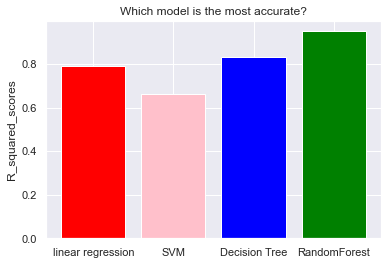

In [37]:
models = ['linear regression','SVM','Decision Tree','RandomForest']
R_squared_scores = [0.79, 0.66, 0.83,0.95]
plt.bar(models, R_squared_scores, color=['red', 'pink','blue','green'])
plt.ylabel("R_squared_scores")
plt.title("Which model is the most accurate?")
plt.show()

## Conclusion

Random forest regressor is a better option when comparison models with better metrics score with a relative error (RE) of at most 20% on average than other models.